In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from pathlib import Path
BASE_DIR = Path().absolute().parent.parent
DIR = BASE_DIR/'scripts_res'/'Algorithms'
DIR

WindowsPath('d:/OneDrive/Current/2_Codes/BO_Related/ASBO/ASBO/scripts_res/Algorithms')

In [3]:
def cleaning(df2,n_init,iter,opt):
    cumulative_max_df = pd.DataFrame()
    for index, row in df2.iterrows():
        initial_max = row[list(range(n_init))].max()
        cumulative_max_list = [initial_max]
        current_max = initial_max
        for iter_value in row[list(range(n_init,n_init+iter,1))]:
            if iter_value > current_max:
                current_max = iter_value  
            cumulative_max_list.append(current_max)  
        cumulative_max_df = pd.concat([cumulative_max_df, pd.DataFrame([cumulative_max_list])], ignore_index=True)
    cumulative_max_df.columns = [f'iter_{i+1}' for i in range(iter+1)]
    non_inf_counts =  cumulative_max_df.count()
    std = cumulative_max_df.std()
    mean = cumulative_max_df.mean(axis=0)
    regret_mean = np.log10(opt - mean)
    upper = np.log10(opt - mean + 1.96*std/np.sqrt(non_inf_counts))
    lower = np.log10(opt - mean - 1.96*std/np.sqrt(non_inf_counts))

    return cumulative_max_df,regret_mean,lower,upper


In [4]:
import scipy.io
from scipy import stats

fmin_store_cell = scipy.io.loadmat(DIR/'Case1_fmin.mat')['fmin_store_cell']

data = []
data_len = []
data_fmin = []
for row in fmin_store_cell:
    for item in row:
        data.append(item.flatten())  
        data_len.append(len(data[-1]))
        data_fmin.append(data[-1][-1])
df = pd.DataFrame(data)
print(np.mean(data_len)-1+50,min(data_len)-1+50,max(data_len)-1+50)
print(np.mean(data_fmin),min(data_fmin),max(data_fmin))
df.describe()

64.53 62 79
1.9670107479947408e-14 6.230985228212818e-16 1.7206105893680105e-13


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,1.500000e+01,1.200000e+01,9.000000e+00,7.000000e+00,6.000000,6.000000e+00,4.000000,4.000000,4.000000e+00,1.000000e+00
mean,2.058542,2.058542,2.058542,2.058542,2.058542,2.058542,2.058542,2.058542,1.917638,1.912279,...,9.892085e-01,5.967195e-01,5.094864e-01,5.124601e-01,0.597870,5.477775e-01,0.821666,0.821666,5.353452e-02,2.479726e-14
std,2.218720,2.218720,2.218720,2.218720,2.218720,2.218720,2.218720,2.218720,1.866211,1.859551,...,1.069855e+00,7.744024e-01,8.064071e-01,8.854285e-01,0.937818,9.684941e-01,1.123940,1.123940,1.070690e-01,NaN
min,0.048848,0.048848,0.048848,0.048848,0.048848,0.048848,0.048848,0.048848,0.001495,0.001495,...,1.016875e-14,5.238779e-15,1.123612e-15,2.589701e-15,0.001495,8.616914e-16,0.001495,0.001495,6.230985e-16,2.479726e-14
25%,0.498178,0.498178,0.498178,0.498178,0.498178,0.498178,0.498178,0.498178,0.491217,0.491217,...,4.678244e-02,1.121370e-03,1.495160e-03,4.678244e-02,0.121174,3.737901e-04,0.160977,0.160977,7.527211e-15,2.479726e-14
50%,1.545604,1.545604,1.545604,1.545604,1.545604,1.545604,1.545604,1.545604,1.505480,1.505480,...,6.057872e-01,2.113120e-01,2.084858e-01,2.084858e-01,0.211312,1.078166e-01,0.409963,0.409963,1.065317e-14,2.479726e-14
75%,2.481482,2.481482,2.481482,2.481482,2.481482,2.481482,2.481482,2.481482,2.461798,2.461798,...,1.850326e+00,1.048815e+00,6.057872e-01,4.099626e-01,0.507875,5.078749e-01,1.070652,1.070652,5.353452e-02,2.479726e-14
max,14.091975,14.091975,14.091975,14.091975,14.091975,14.091975,14.091975,14.091975,9.391090,9.391090,...,2.902919e+00,2.465244e+00,2.465244e+00,2.465244e+00,2.465244,2.465244e+00,2.465244,2.465244,2.141381e-01,2.479726e-14


In [5]:
data_list8 = df.apply(lambda row: row[~row.isin([np.nan])].iloc[-1], axis=1).tolist()

In [6]:
df.loc[:,:]= -df.values
dfFDBO=df
dfFDBO

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.270764,-0.270764,-0.270764,-0.270764,-0.270764,-0.270764,-0.270764,-0.270764,-0.270764,-0.270764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.378016,-0.378016,-0.378016,-0.378016,-0.378016,-0.378016,-0.378016,-0.378016,-0.378016,-0.378016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.605787,-0.605787,-0.605787,-0.605787,-0.605787,-0.605787,-0.605787,-0.605787,-0.605787,-0.605787,...,-0.605787,-0.605787,-6.057872e-01,-0.605787,-0.605787,-0.605787,-0.605787,-0.605787,-6.230985e-16,NaN
3,-1.108950,-1.108950,-1.108950,-1.108950,-1.108950,-1.108950,-1.108950,-1.108950,-1.108950,-1.108950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-5.650895,-5.650895,-5.650895,-5.650895,-5.650895,-5.650895,-5.650895,-5.650895,-5.650895,-5.650895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.374466,-1.374466,-1.374466,-1.374466,-1.374466,-1.374466,-1.374466,-1.374466,-1.374466,-1.374466,...,-1.374466,-1.374466,-3.038296e-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,-0.676383,-0.676383,-0.676383,-0.676383,-0.676383,-0.676383,-0.676383,-0.676383,-0.676383,-0.676383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,-6.056861,-6.056861,-6.056861,-6.056861,-6.056861,-6.056861,-6.056861,-6.056861,-6.056861,-6.056861,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,-1.646019,-1.646019,-1.646019,-1.646019,-1.646019,-1.646019,-1.646019,-1.646019,-1.646019,-1.646019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
_,regret_mean_FDBO,lower_FDBO,upper_FDBO = cleaning(df,n_init=1,iter=29,opt=0)

e:\ProgramData\miniconda3\envs\ASBO\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
# def confidence_interval(data):
#     n = len(data)
#     mean = np.mean(data)
#     std_err = stats.sem(data)
#     conf_int = stats.t.interval(0.95, n, loc=mean, scale=std_err)
#     return conf_int
    
# conf_intervals = df.apply(confidence_interval)

# regret_mean_FDBO = np.log10(df.mean(axis=0) - 0)
# lower_FDBO = np.log10(conf_intervals.loc[0,:] - 0)
# upper_FDBO = np.log10(conf_intervals.loc[1,:] - 0)

# conf_intervals

In [9]:
file_path1 = DIR/'ASBO_Results2_Case1_100.csv' 
file_path2 = DIR/'CBO_Results2_Case1_100.csv' 
file_path3 = DIR/'SCBO_Results2_Case1_100.csv' 

df = pd.read_csv(file_path1)
_,regret_mean_ASBO,lower_ASBO,upper_ASBO = cleaning(df,n_init=50,iter=50,opt=0)
df = pd.read_csv(file_path2)
_,regret_mean_CBO,lower_CBO,upper_CBO = cleaning(df,n_init=50,iter=50,opt=0)
df = pd.read_csv(file_path3)
_,regret_mean_SCBO,lower_SCBO,upper_SCBO = cleaning(df,n_init=50,iter=50,opt=0)


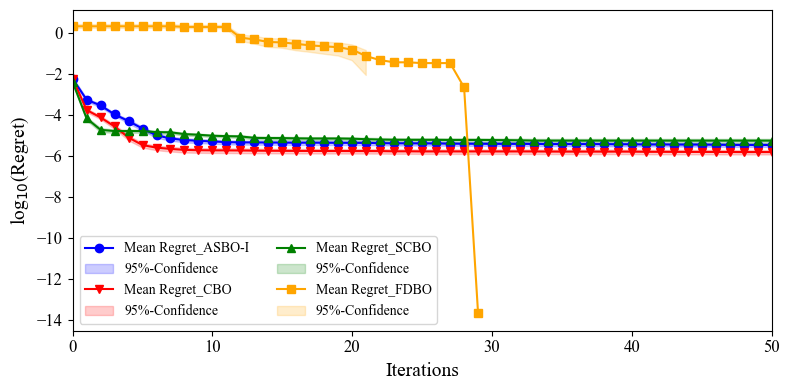

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(range(regret_mean_ASBO.shape[0]), regret_mean_ASBO, marker='o', color='b', label='Mean Regret_ASBO-I')
plt.fill_between(range(regret_mean_ASBO.shape[0]), lower_ASBO , upper_ASBO, color='b', alpha=0.2, label='95%-Confidence')

plt.plot(range(regret_mean_CBO.shape[0]), regret_mean_CBO, marker='v', color='r', label='Mean Regret_CBO')
plt.fill_between(range(regret_mean_CBO.shape[0]), lower_CBO , upper_CBO, color='r', alpha=0.2, label='95%-Confidence')

plt.plot(range(regret_mean_SCBO.shape[0]), regret_mean_SCBO, marker='^', color='g', label='Mean Regret_SCBO')
plt.fill_between(range(regret_mean_SCBO.shape[0]), lower_SCBO , upper_SCBO, color='g', alpha=0.2, label='95%-Confidence')

plt.plot(range(regret_mean_FDBO.shape[0]), regret_mean_FDBO, marker='s', color='orange', label='Mean Regret_FDBO')
plt.fill_between(range(regret_mean_FDBO.shape[0]), lower_FDBO , upper_FDBO, color='orange', alpha=0.2, label='95%-Confidence')

# plt.yscale('log')
plt.xlabel('Iterations', fontsize=14)
plt.xlim(0,50)
# plt.ylabel(r"$\log_{10}(\mathrm{Regret})$", fontsize=14)
plt.ylabel(r"log$_{10}$(Regret)", fontsize=14)
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig(DIR/'Regret_Case1.png',dpi=300)
plt.show()


In [ ]:
data_dict = {
    'Mean_ASBO': regret_mean_ASBO,
    'Lower_ASBO': lower_ASBO,
    'Upper_ASBO': upper_ASBO,
    'Mean_CBO': regret_mean_CBO,
    'Lower_CBO': lower_CBO,
    'Upper_CBO': upper_CBO,
    'Mean_SCBO': regret_mean_SCBO,
    'Lower_SCBO': lower_SCBO,
    'Upper_SCBO': upper_SCBO,
    'Mean_FDBO': regret_mean_FDBO,
    'Lower_FDBO': lower_FDBO,
    'Upper_FDBO': upper_FDBO,
}

combined_df = pd.concat(data_dict, axis=1)  
combined_df.to_csv(DIR/'Figure2_Case1.csv') 

In [12]:
file_path1 = DIR/'ASBO_Results_Case1_100.csv' 
file_path2 = DIR/'SCBO_Results_Case1_100.csv' 
file_path3 = DIR/'CBO_Results_Case1_100.csv' 
file_path4 = DIR/'GA_Results_Case1_100.csv' 
file_path5 = DIR/'PSO_Results_Case1_100.csv' 
file_path6 = DIR/'slsqp_Results_Case1_100.csv'
file_path7 = DIR/'trust-constr_Results_Case1_100.csv' 

df = pd.read_csv(file_path1)
data_list1 = [-num for num in df['obj']]
df = pd.read_csv(file_path2)
data_list2 = [-num for num in df['obj']]
df = pd.read_csv(file_path3)
data_list3 = [-num for num in df['obj']]
df = pd.read_csv(file_path4)
data_list4 = df['obj'].tolist() 
df = pd.read_csv(file_path5)
data_list5 = df['obj'].tolist() 
df = pd.read_csv(file_path6)
data_list6 = df['obj'].tolist() 
df = pd.read_csv(file_path7)
data_list7 = df['obj'].tolist() 

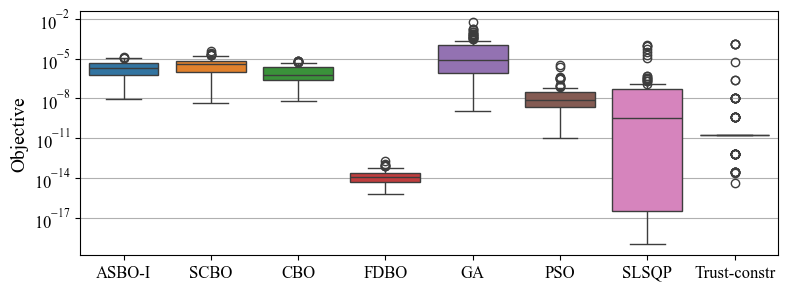

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = [data_list1, data_list2, data_list3, data_list8, data_list4, data_list5, data_list6, data_list7]
labels = ['ASBO-I', 'SCBO', 'CBO','FDBO','GA', 'PSO', 'SLSQP', 'Trust-constr']

plt.figure(figsize=(8, 3))
sns.boxplot(data=data)
plt.yscale('log')
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.ylabel('Objective', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig(DIR/'Box_Case1.png',dpi=300)
plt.show()


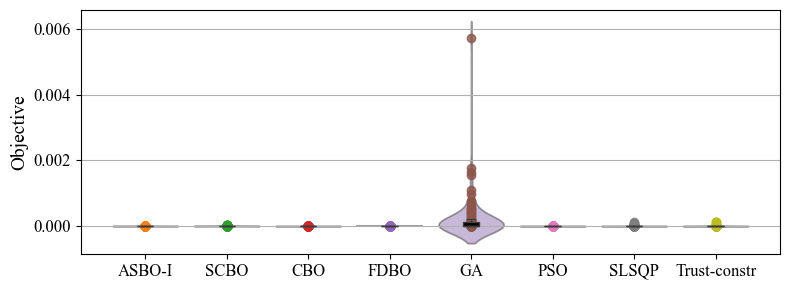

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [data_list1, data_list2, data_list3, data_list8, data_list4, data_list5, data_list6, data_list7]

plt.figure(figsize=(8, 3))

sns.violinplot(data=data, inner=None, alpha=0.5)
sns.boxplot(data=data, width=0.2, color='k', fliersize=0)  # 只绘制箱体，不显示异常值

for i, algorithm in enumerate(data):
    plt.scatter([i] * len(algorithm), algorithm, alpha=0.8)
# plt.yscale('log')
plt.xticks(ticks=np.arange(len(data)), labels=['ASBO-I', 'SCBO', 'CBO', 'FDBO','GA', 'PSO', 'SLSQP', 'Trust-constr'])
plt.ylabel('Objective', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
# plt.savefig('Violin_Case1.png',dpi=300)
plt.show()
